In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

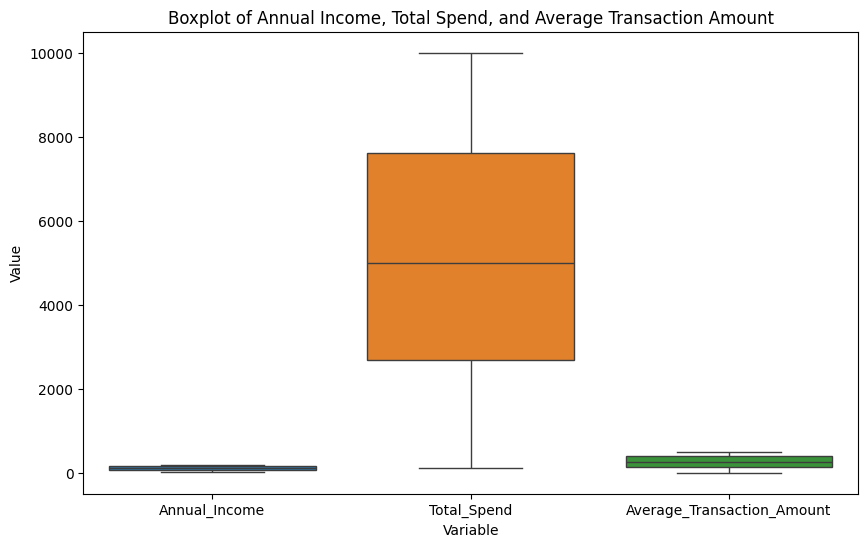

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Annual_Income', 'Total_Spend', 'Average_Transaction_Amount']])
plt.title('Boxplot of Annual Income, Total Spend, and Average Transaction Amount')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In [27]:
categoricals = ["Gender", "Email_Opt_In", "Promotion_Response", "Target_Churn"]

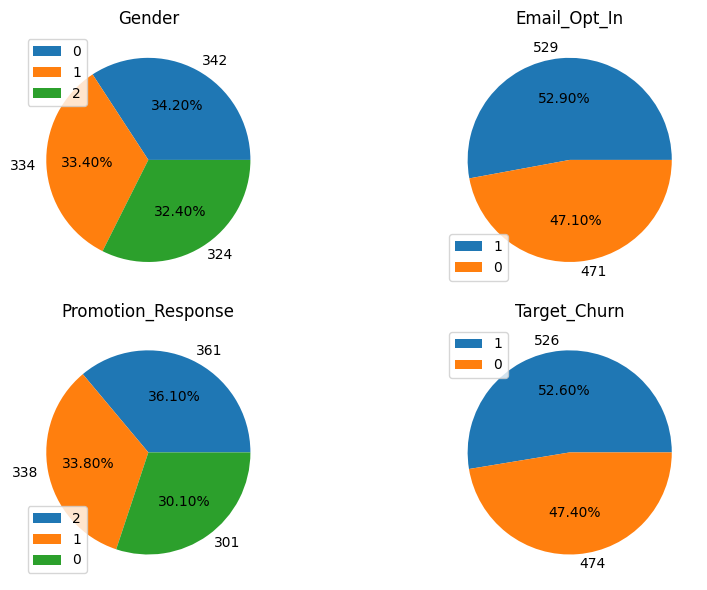

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

index = 0

for i in range(2):
    for j in range(2):
        counts = df[categoricals[index]].value_counts()
        
        axes[i][j].pie(counts, autopct="%0.2f%%", labels=counts)
        
        axes[i][j].legend(counts.index)
        
        axes[i][j].set_title(categoricals[index])
        
        index += 1

plt.tight_layout()

plt.show()

C:\Users\asmit\AppData\Local\Temp\ipykernel_14844\738136521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target_Churn', y='Total_Spend', palette='coolwarm')


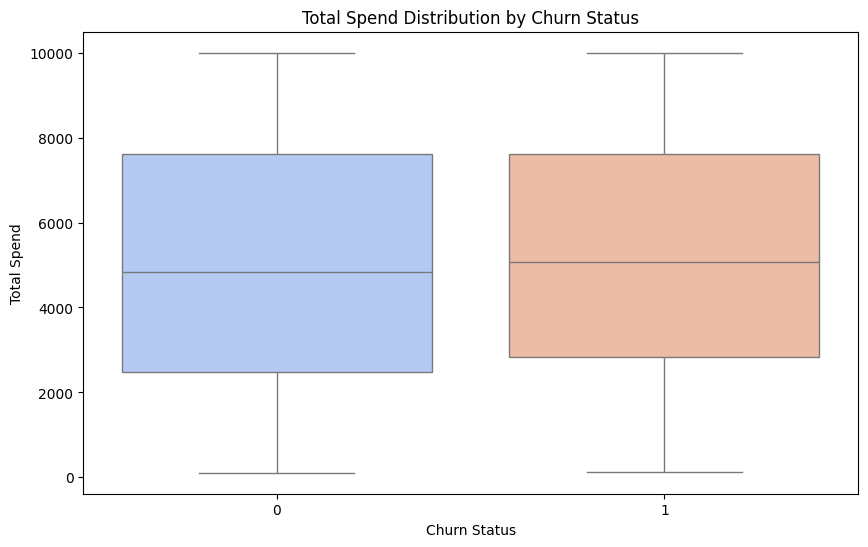

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Target_Churn', y='Total_Spend', palette='coolwarm')
plt.title('Total Spend Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Spend')
plt.show()


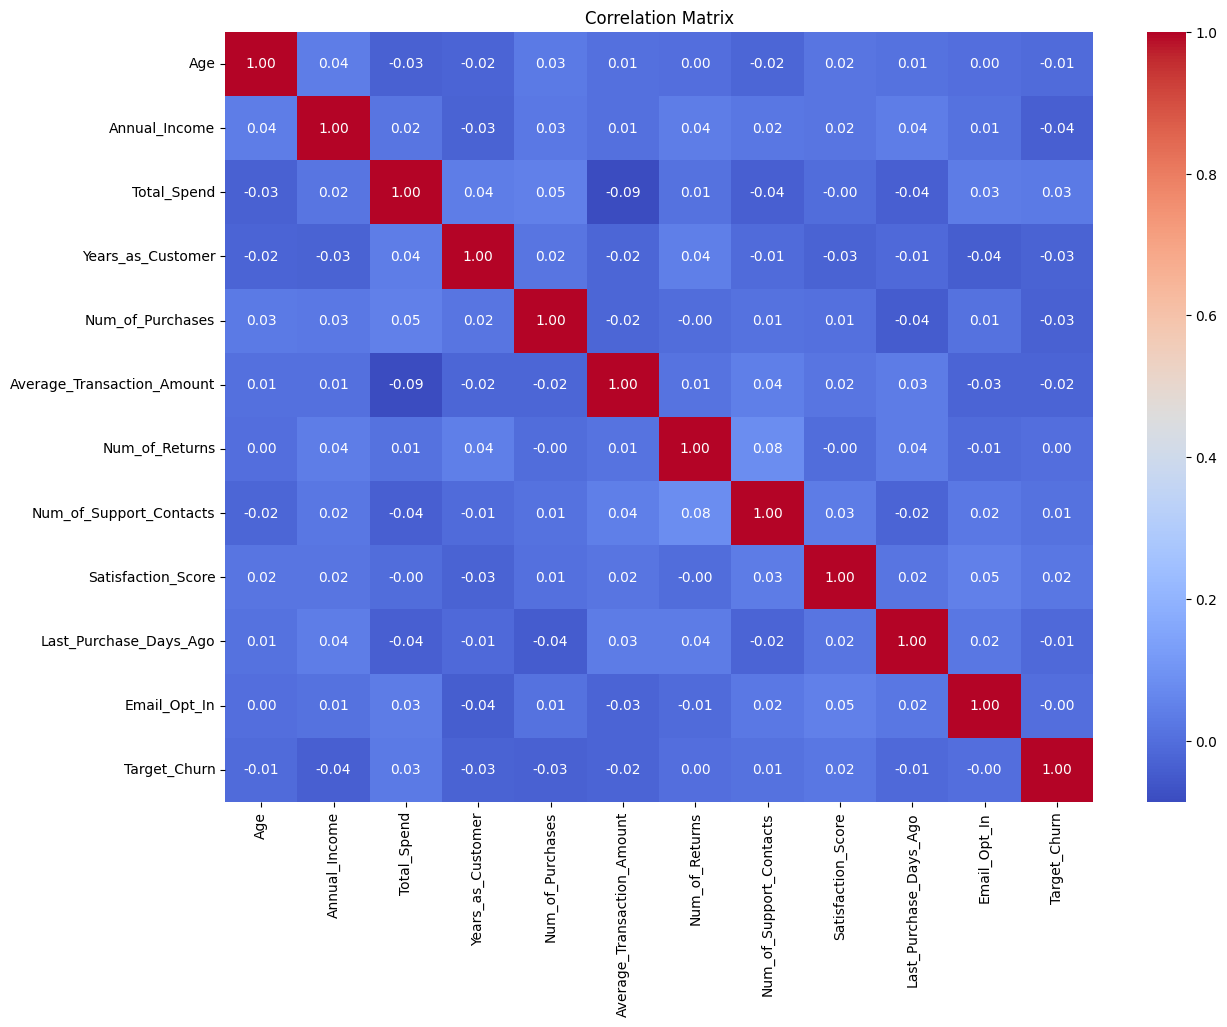

In [30]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [31]:
le = LabelEncoder()
for i in categoricals:
    df[i] = le.fit_transform(df[i])

In [32]:
df.drop(columns='Customer_ID', inplace = True)

KeyError: "['Customer_ID'] not found in axis"

In [ ]:
X = df.drop(columns=['Target_Churn'])  
y = df['Target_Churn']  

In [ ]:
X

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_preds = svm_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.53



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.53      1.00      0.69       106

    accuracy                           0.53       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.28      0.53      0.37       200



C:\Users\asmit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asmit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asmit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

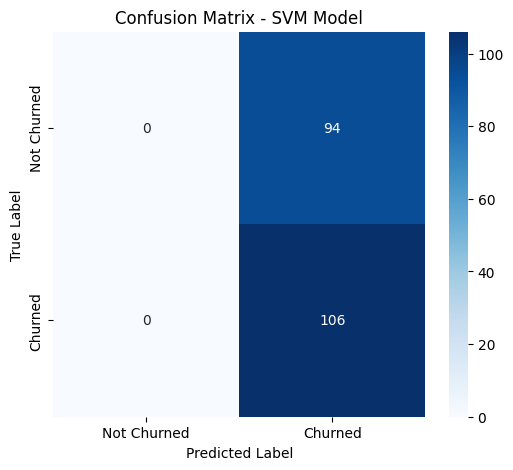

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nSVM Classification Report:")
print(classification_report(y_test, y_preds))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_preds, "SVM Model")

In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_predsss = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predsss)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\asmit\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.58



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.45      0.50        94
           1       0.59      0.70      0.64       106

    accuracy                           0.58       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      0.58      0.57       200



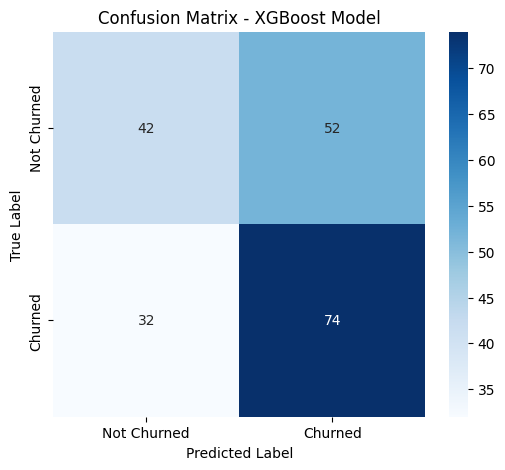

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_predsss))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_predsss, "XGBoost Model")

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_e = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_e)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.51



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        94
           1       0.54      0.54      0.54       106

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



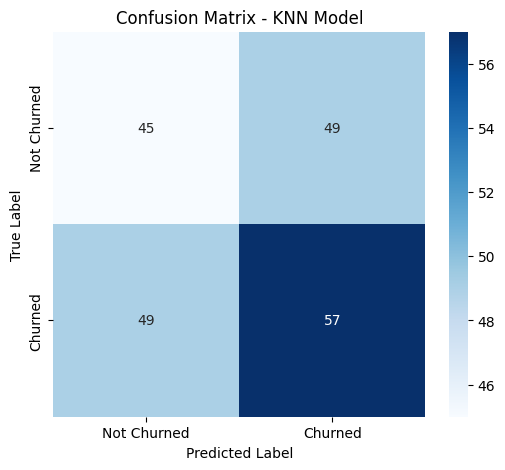

In [39]:
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_e))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred_e)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_e, "KNN Model")

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))  
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))      

model = Sequential([
    LSTM(32, activation='tanh', return_sequences=False),  
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),  
    Dropout(0.2),
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', metrics=['accuracy'])  

history = model.fit(X_train, y_train, epochs=25, batch_size=16,  verbose=1)

train_accuracy = history.history['accuracy'][-1]  

print(f"Training Accuracy: {train_accuracy:.4f}")


ImportError: Traceback (most recent call last):
  File "C:\Users\asmit\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:

lstm_predictions = model.predict(X_test)
lstm_predictions = (lstm_predictions > 0.5).astype(int)  


print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_predictions))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, lstm_predictions, "LSTM Model")



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))  
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))      

model = Sequential([
    SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),  
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(32, activation='tanh', return_sequences=False),  
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),  
    Dropout(0.2),
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', metrics=['accuracy'])  

history = model.fit(X_train, y_train, epochs=65, batch_size=16, verbose=1)

train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

rnn_predictionss = model.predict(X_test)
rnn_predictionss = (rnn_predictionss > 0.5).astype(int)  


print("\nRNN Classification Report:")
print(classification_report(y_test, rnn_predictionss))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, rnn_predictionss, "RNN Model")



In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)


In [ ]:
import pickle

with open('model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)
import numpy as np

single_input = np.array([[65,1,79.51,9025.47,13,77,22.90,2,0,3,227,0,1]])

# Make the prediction
single_prediction = xgb_model.predict(single_input)

print(f'Single Input Prediction: {single_prediction[0]}')


In [ ]:
import shap
import numpy as np
import xgboost as xgb
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])
shap_interaction_values = explainer.shap_interaction_values(X_test)

shap.summary_plot(shap_interaction_values, X_test)



In [ ]:
import shap

shap_values = explainer.shap_values(X_test)

shap.dependence_plot('Satisfaction_Score', shap_values, X_test)


In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X_test)

shap.dependence_plot(('Annual_Income', 'Num_of_Purchases'), shap_interaction_values, X_test)


In [ ]:
shap.decision_plot(explainer.expected_value, shap_values, X_test)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(shap_values, cmap='coolwarm', center=0)
plt.title('SHAP Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Instances')
plt.show()
